# 1. Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [3]:
from datetime import datetime, timedelta

In [4]:
import yfinance as yf

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
start = datetime(2018,1,1)
end = datetime(2023, 11, 23)

In [36]:
google = yf.Ticker('GOOG')
msft=yf.Ticker('MSFT')
appl=yf.Ticker('AAPL')
amzn=yf.Ticker('AMZN')

In [37]:
google_df = google.history(start=start, end=end)
msft_df = msft.history(start=start, end=end)
appl_df=appl.history(start=start, end=end)
amzn_df=amzn.history(start=start, end=end)

In [9]:
google_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-01-02 00:00:00-05:00,52.417000,53.347000,52.261501,53.250000,24752000,0.0,0.0
2018-01-03 00:00:00-05:00,53.215500,54.314499,53.160500,54.124001,28604000,0.0,0.0
2018-01-04 00:00:00-05:00,54.400002,54.678501,54.200100,54.320000,20092000,0.0,0.0
2018-01-05 00:00:00-05:00,54.700001,55.212502,54.599998,55.111500,25582000,0.0,0.0
2018-01-08 00:00:00-05:00,55.111500,55.563499,55.081001,55.347000,20952000,0.0,0.0


In [10]:
msft_df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-11-16 00:00:00-05:00,370.959991,376.350006,370.179993,376.170013,27182300,0.0,0.0
2023-11-17 00:00:00-05:00,373.609985,374.369995,367.000000,369.850006,40157000,0.0,0.0
2023-11-20 00:00:00-05:00,371.220001,378.869995,371.000000,377.440002,52465100,0.0,0.0
2023-11-21 00:00:00-05:00,375.670013,376.220001,371.119995,373.070007,28423100,0.0,0.0
2023-11-22 00:00:00-05:00,378.000000,379.790009,374.970001,377.850006,23345300,0.0,0.0


In [143]:
# 这个最好放到ppt上

df_all.describe()

,Google,Microsoft,Apple,Amazon
count,1483.000000,1483.000000,1483.000000,1483.000000
mean,0.084701,0.122784,0.124567,0.086052
std,1.973396,1.910231,2.009380,2.242313
min,-11.100818,-14.739033,-12.864692,-14.049438
25%,-0.868650,-0.810038,-0.837616,-1.060933
50%,0.116582,0.131206,0.125477,0.123403
75%,1.104347,1.114272,1.198885,1.228387
max,10.448541,14.216912,11.980822,13.535902


# 2. Pre-processing

In [43]:
# 选择闭市价
g_returns = 100 * google_df[['Close']].pct_change().dropna() 
ms_returns = 100 * msft_df[['Close']].pct_change().dropna() 
appl_returns=100 * appl_df[['Close']].pct_change().dropna() 
amzn_returns=100 * amzn_df[['Close']].pct_change().dropna() 

### Decomposition

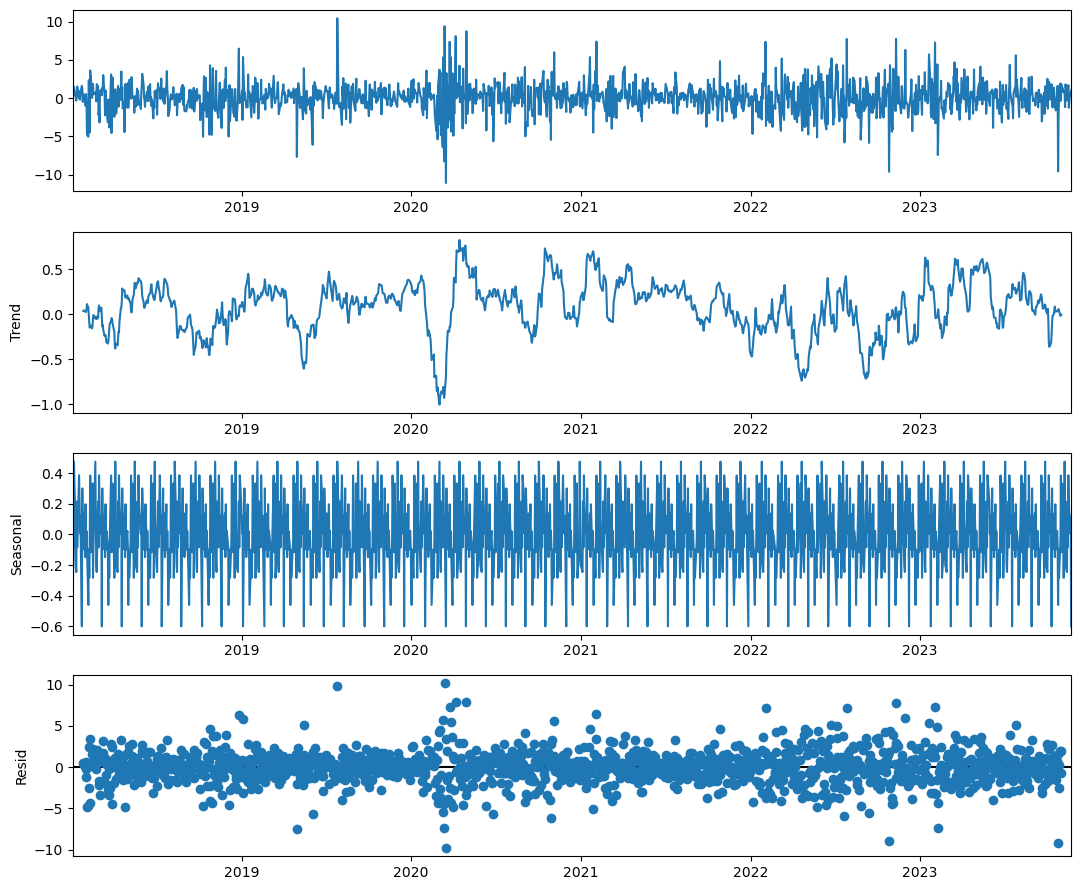

In [40]:
from pylab import rcParams

# Google

rcParams['figure.figsize'] = 11, 9
decomposed = sm.tsa.seasonal_decompose(g_returns,period=30) # Check whether there exists monthly seasonality
figure = decomposed.plot() 
plt.show()

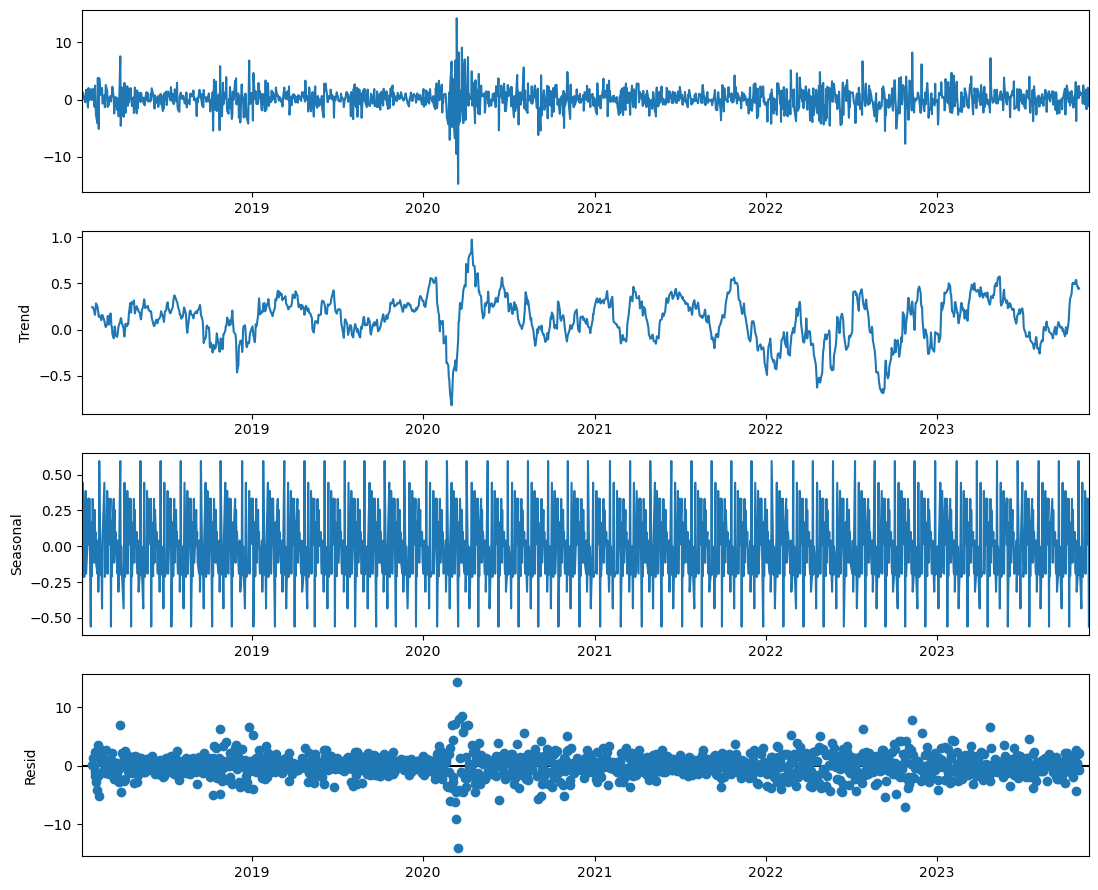

In [41]:
# Microsoft
rcParams['figure.figsize'] = 11, 9
decomposed = sm.tsa.seasonal_decompose(ms_returns,period=30) # Check whether there exists monthly seasonality
figure = decomposed.plot() 
plt.show()

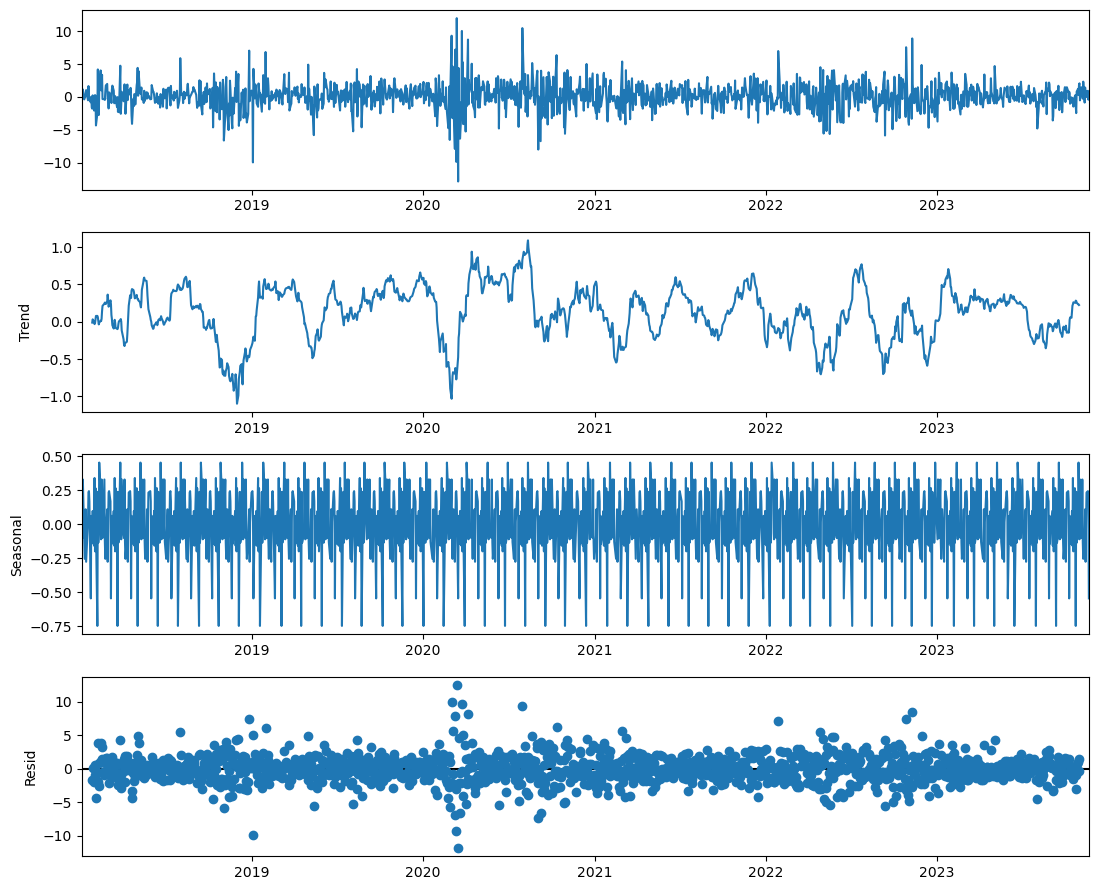

In [44]:
# Apple

rcParams['figure.figsize'] = 11, 9
decomposed = sm.tsa.seasonal_decompose(appl_returns,period=30) # Check whether there exists monthly seasonality
figure = decomposed.plot() 
plt.show()

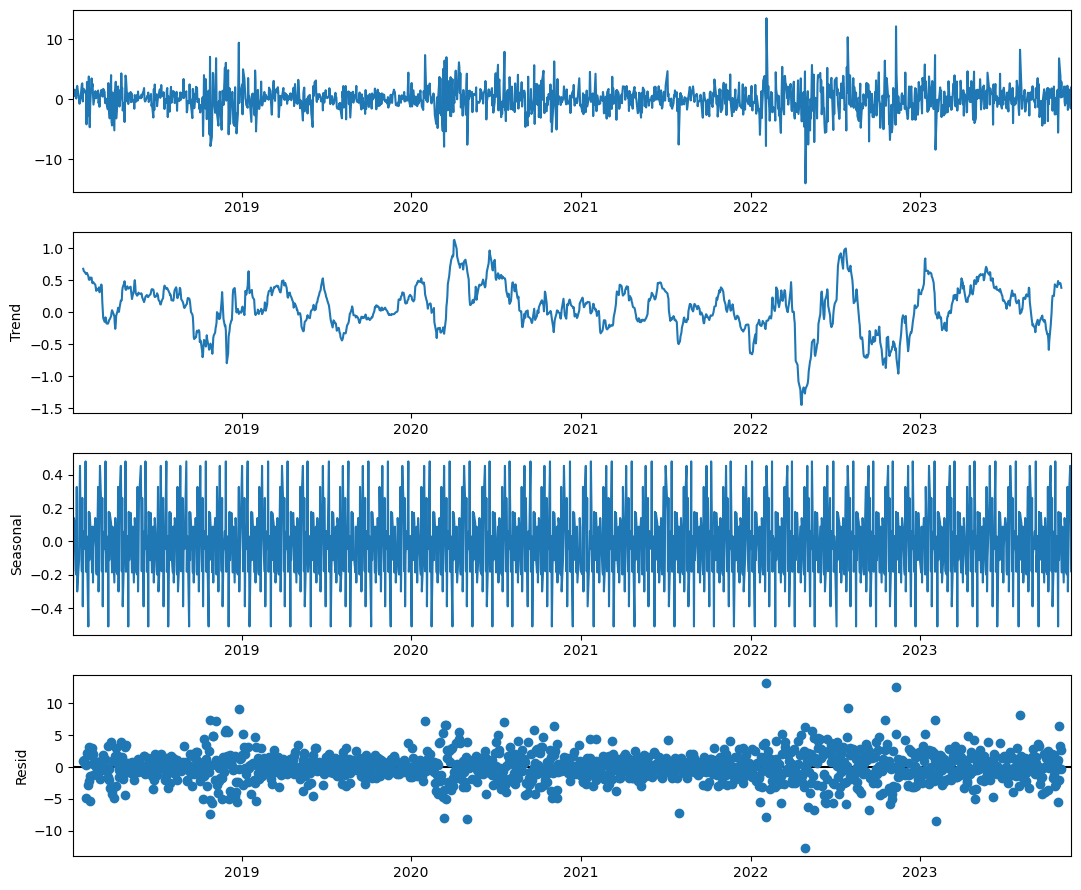

In [45]:
#Amazon

rcParams['figure.figsize'] = 11, 9
decomposed = sm.tsa.seasonal_decompose(amzn_returns,period=30) # Check whether there exists monthly seasonality
figure = decomposed.plot() 
plt.show()

### Correlations

In [53]:
df_all = pd.concat([g_returns, ms_returns, appl_returns, amzn_returns], axis=1)

df_all.columns = ['Google', 'Microsoft', 'Apple', 'Amazon']

df_all.head()

,Google,Microsoft,Apple,Amazon
Date,,,,
2018-01-03 00:00:00-05:00,1.641316,0.465415,-0.017395,1.277531
2018-01-04 00:00:00-05:00,0.362130,0.880166,0.464501,0.447601
2018-01-05 00:00:00-05:00,1.457106,1.239798,1.138508,1.616252
2018-01-08 00:00:00-05:00,0.427316,0.102050,-0.371413,1.442468
2018-01-09 00:00:00-05:00,-0.061431,-0.068004,-0.011467,0.467571


Text(0.5, 1.0, 'Correlation of stock closing return')

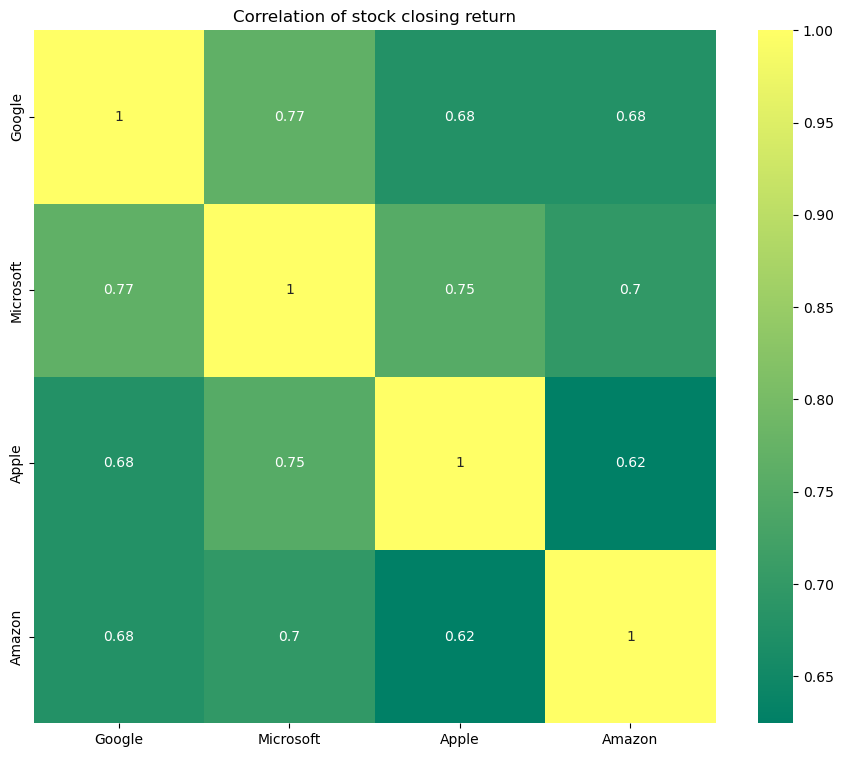

In [58]:
plt.figure()
sns.heatmap(df_all.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing return')

## Stationarity Check

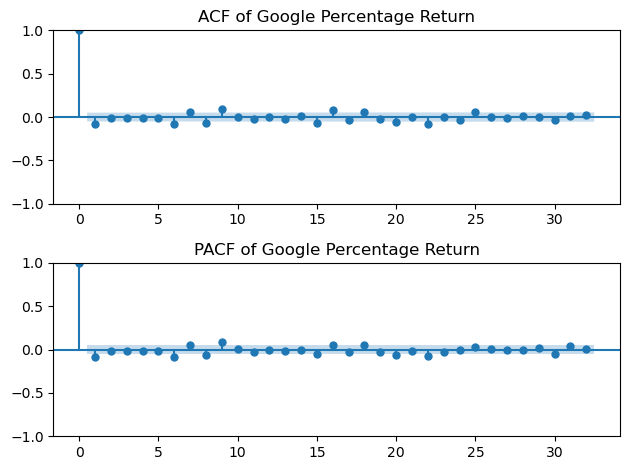

In [16]:
fig, axs = plt.subplots(2)

plot_acf(g_returns, ax=axs[0])
axs[0].set_title('ACF of Google Percentage Return')
plot_pacf(g_returns, ax=axs[1])
axs[1].set_title('PACF of Google Percentage Return')

plt.tight_layout()
plt.show()

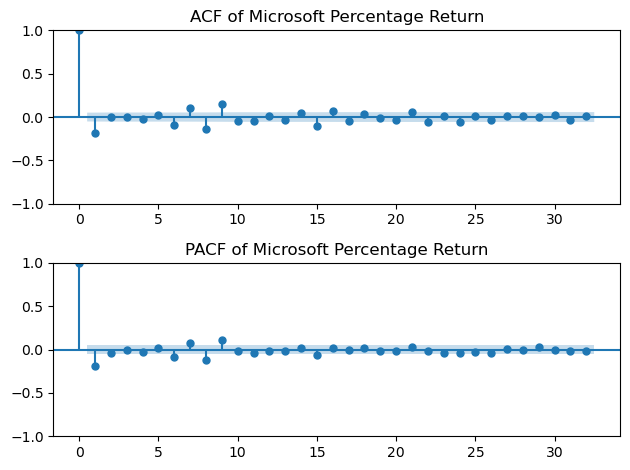

In [17]:
fig, axs = plt.subplots(2)

plot_acf(ms_returns, ax=axs[0])
axs[0].set_title('ACF of Microsoft Percentage Return')
plot_pacf(ms_returns, ax=axs[1])
axs[1].set_title('PACF of Microsoft Percentage Return')

plt.tight_layout()
plt.show()

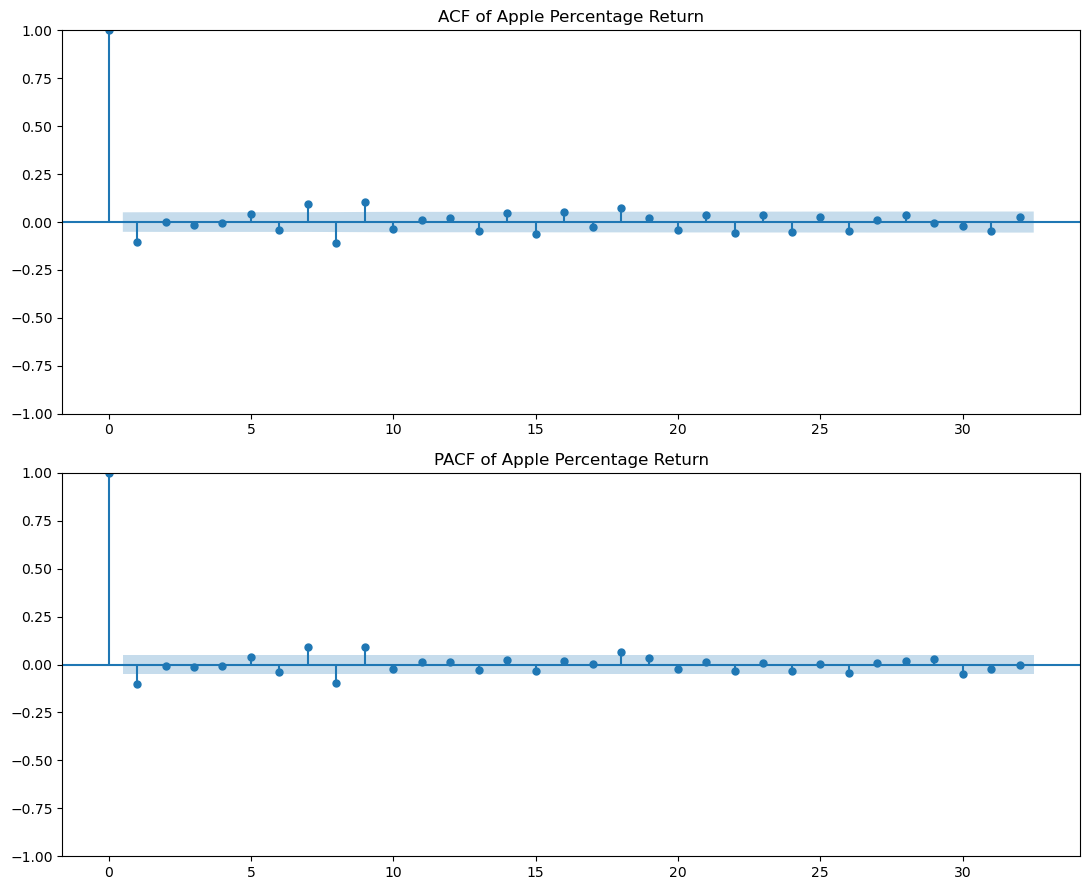

In [59]:
fig, axs = plt.subplots(2)

plot_acf(appl_returns, ax=axs[0])
axs[0].set_title('ACF of Apple Percentage Return')
plot_pacf(appl_returns, ax=axs[1])
axs[1].set_title('PACF of Apple Percentage Return')

plt.tight_layout()
plt.show()

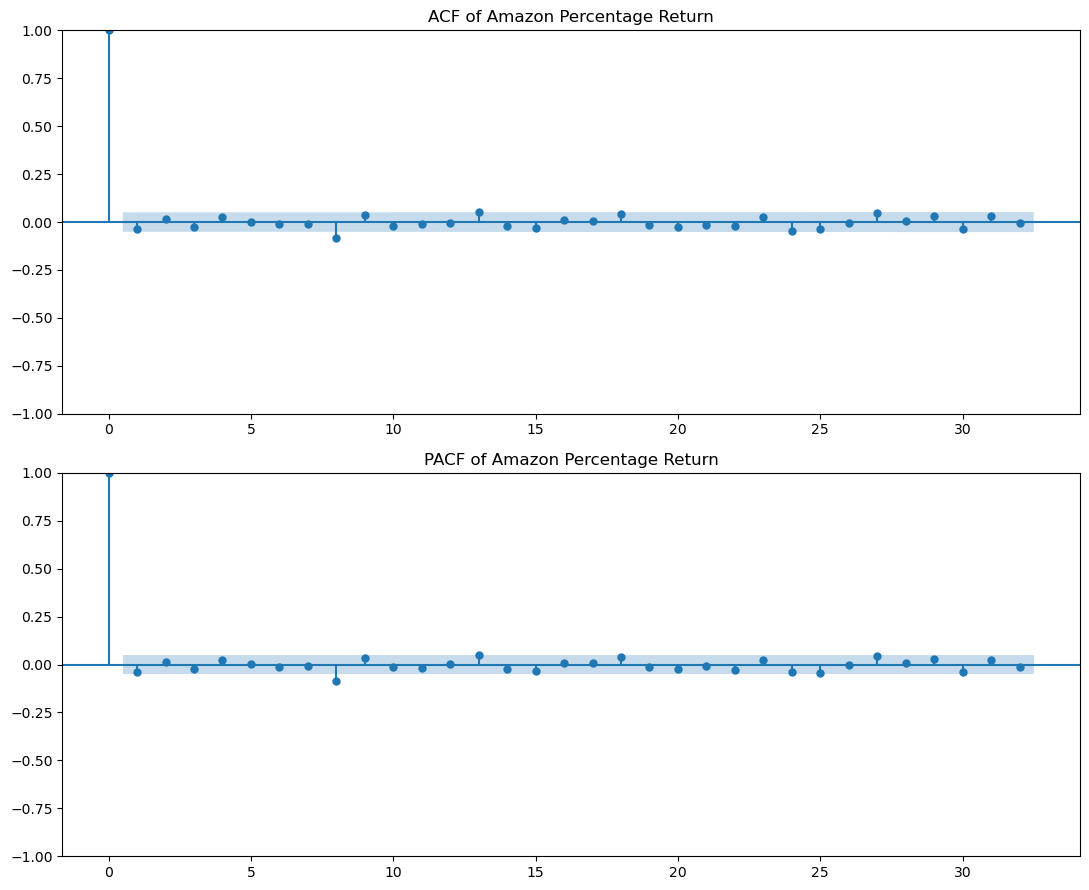

In [60]:
fig, axs = plt.subplots(2)

plot_acf(amzn_returns, ax=axs[0])
axs[0].set_title('ACF of Amazon Percentage Return')
plot_pacf(amzn_returns, ax=axs[1])
axs[1].set_title('PACF of Amazon Percentage Return')

plt.tight_layout()
plt.show()

### The Augmented Dickey-Fuller test

In [61]:
from statsmodels.tsa.stattools import adfuller

goo_adftest = adfuller(g_returns)
goo_adf_results= pd.Series(goo_adftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in goo_adftest[4].items():
    goo_adf_results['Critical Value (%s)'%key] = value
goo_adf_results

Test Statistic                -9.414402e+00
p-value                        5.720638e-16
#Lags Used                     2.100000e+01
Number of Observations Used    1.461000e+03
Critical Value (1%)           -3.434834e+00
Critical Value (5%)           -2.863520e+00
Critical Value (10%)          -2.567824e+00
dtype: float64

In [62]:
# As the p-value is less than 0.05, so reject the null hypothesis. Thus, the data is stationary.

In [63]:
msft_adftest = adfuller(ms_returns)
msft_adf_results= pd.Series(msft_adftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in msft_adftest[4].items():
    msft_adf_results['Critical Value (%s)'%key] = value
msft_adf_results

Test Statistic                -1.291611e+01
p-value                        3.963008e-24
#Lags Used                     8.000000e+00
Number of Observations Used    1.474000e+03
Critical Value (1%)           -3.434794e+00
Critical Value (5%)           -2.863503e+00
Critical Value (10%)          -2.567815e+00
dtype: float64

In [23]:
# As the p-value is less than 0.05, so reject the null hypothesis. Thus, the data is stationary.

In [64]:
appl_adftest = adfuller(appl_returns)
appl_adf_results= pd.Series(appl_adftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in appl_adftest[4].items():
    appl_adf_results['Critical Value (%s)'%key] = value
appl_adf_results

Test Statistic                -1.212183e+01
p-value                        1.817876e-22
#Lags Used                     8.000000e+00
Number of Observations Used    1.474000e+03
Critical Value (1%)           -3.434794e+00
Critical Value (5%)           -2.863503e+00
Critical Value (10%)          -2.567815e+00
dtype: float64

In [65]:
amzn_adftest = adfuller(amzn_returns)
amzn_adf_results= pd.Series(amzn_adftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in amzn_adftest[4].items():
    amzn_adf_results['Critical Value (%s)'%key] = value
amzn_adf_results

Test Statistic                  -39.904763
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1482.000000
Critical Value (1%)              -3.434770
Critical Value (5%)              -2.863492
Critical Value (10%)             -2.567809
dtype: float64

In [66]:
# Reject all H0, unit root doesn't exists. All stationary(trend-stationary).

# 3. Fit VAR model

In [80]:
# Train (90%) & Test (10%) Split

nobs = round(0.1*len(df_all))
train, test = df_all[0:-nobs], df_all[-nobs:]

In [81]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1335 entries, 2018-01-03 00:00:00-05:00 to 2023-04-24 00:00:00-04:00
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Google     1335 non-null   float64
 1   Microsoft  1335 non-null   float64
 2   Apple      1335 non-null   float64
 3   Amazon     1335 non-null   float64
dtypes: float64(4)
memory usage: 52.1 KB


In [82]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 148 entries, 2023-04-25 00:00:00-04:00 to 2023-11-22 00:00:00-05:00
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Google     148 non-null    float64
 1   Microsoft  148 non-null    float64
 2   Apple      148 non-null    float64
 3   Amazon     148 non-null    float64
dtypes: float64(4)
memory usage: 5.8 KB


In [94]:
model = VAR(df_all)
aic=[]
for i in range(30):
    result = model.fit(i)
    aic.append(result.aic)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')
    


Lag Order = 0
AIC :  3.104277478554732
BIC :  3.118577741109386
FPE :  22.29310592608539
HQIC:  3.109607884234623 

Lag Order = 1
AIC :  3.0677128315356823
BIC :  3.139253287755062
FPE :  21.492691217000576
HQIC:  3.094380350279902 

Lag Order = 2
AIC :  3.0836100566577667
BIC :  3.212453420137605
FPE :  21.837106484486224
HQIC:  3.1316395072247474 

Lag Order = 3
AIC :  3.0855759640639944
BIC :  3.2717850607338756
FPE :  21.88010488913756
HQIC:  3.154992210914155 

Lag Order = 4
AIC :  3.0954120091754187
BIC :  3.3390497775759154
FPE :  22.096430045790033
HQIC:  3.1862399625858218 

Lag Order = 5
AIC :  3.1051261664365932
BIC :  3.4062556579972725
FPE :  22.312204513048766
HQIC:  3.2173907826159627 

Lag Order = 6
AIC :  3.105201264665861
BIC :  3.4638856439841668
FPE :  22.313998084781158
HQIC:  3.2389275458699696 

Lag Order = 7
AIC :  3.095226960109432
BIC :  3.5115295052304405
FPE :  22.09269896793178
HQIC:  3.2504399547568537 

Lag Order = 8
AIC :  3.0964476974512833
BIC :  3.570

In [97]:
aic.sort()
aic

[3.0677128315356823,
 3.0836100566577667,
 3.0855759640639944,
 3.095226960109432,
 3.0954120091754187,
 3.0962820678295953,
 3.0964476974512833,
 3.104277478554732,
 3.1051261664365932,
 3.105201264665861,
 3.110926298921508,
 3.125676074793325,
 3.1399572660296404,
 3.1452908617581867,
 3.149366446468089,
 3.1655852841739875,
 3.173248222728443,
 3.191337627396378,
 3.1948152833054366,
 3.2012283535226596,
 3.202695930182578,
 3.206243376933695,
 3.209309092718468,
 3.2134777472425666,
 3.223719646337244,
 3.225692649934739,
 3.229451584421283,
 3.2364018681640183,
 3.243249091792046,
 3.262299523342194]

In [98]:
# lag=1时有最小的AIC

In [144]:
# According to AIC check, the explicitly computed AIC is the lowest at lag 1.

model = VAR(train)
model_fitted = model.fit(1)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 27, Nov, 2023
Time:                     18:19:15
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    3.14125
Nobs:                     1481.00    HQIC:                   3.09635
Log likelihood:          -10658.9    FPE:                    21.5347
AIC:                      3.06967    Det(Omega_mle):         21.2464
--------------------------------------------------------------------
Results for equation Google
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.101778         0.050970            1.997           0.046
L1.Google            0.009373         0.042947            0.218           0.827
L1.Microsoft        -0.099225         0.049464           -2.006

## Granger Casuality Check

In [145]:
# As the data is stationary, so we can now conduct Granger Casuality Check

In [146]:
from statsmodels.tsa.stattools import grangercausalitytests

In [163]:
for i in range(len(df_all.columns)):
    for j in range(len(df_all.columns)):
        if i != j:
            print(f"\nGranger Causality test for {df_all.columns[j]} caused by {df_all.columns[i]}:")
            grangercausalitytests(df_all[[df_all.columns[j], df_all.columns[i]]], maxlag=30)



Granger Causality test for Microsoft caused by Google:

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0148  , p=0.9031  , df_denom=1479, df_num=1
ssr based chi2 test:   chi2=0.0149  , p=0.9030  , df=1
likelihood ratio test: chi2=0.0149  , p=0.9030  , df=1
parameter F test:         F=0.0148  , p=0.9031  , df_denom=1479, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0073  , p=0.9927  , df_denom=1476, df_num=2
ssr based chi2 test:   chi2=0.0146  , p=0.9927  , df=2
likelihood ratio test: chi2=0.0146  , p=0.9927  , df=2
parameter F test:         F=0.0073  , p=0.9927  , df_denom=1476, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.3463  , p=0.0185  , df_denom=1473, df_num=3
ssr based chi2 test:   chi2=10.0865 , p=0.0178  , df=3
likelihood ratio test: chi2=10.0523 , p=0.0181  , df=3
parameter F test:         F=3.3463  , p=0.0185  , df_denom=1473, df_num=3

Granger Causality
number of lag

ssr based F test:         F=1.6860  , p=0.0130  , df_denom=1395, df_num=29
ssr based chi2 test:   chi2=50.9625 , p=0.0071  , df=29
likelihood ratio test: chi2=50.0897 , p=0.0088  , df=29
parameter F test:         F=1.6860  , p=0.0130  , df_denom=1395, df_num=29

Granger Causality
number of lags (no zero) 30
ssr based F test:         F=1.6393  , p=0.0164  , df_denom=1392, df_num=30
ssr based chi2 test:   chi2=51.3335 , p=0.0090  , df=30
likelihood ratio test: chi2=50.4475 , p=0.0111  , df=30
parameter F test:         F=1.6393  , p=0.0164  , df_denom=1392, df_num=30

Granger Causality test for Apple caused by Google:

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1882  , p=0.2759  , df_denom=1479, df_num=1
ssr based chi2 test:   chi2=1.1906  , p=0.2752  , df=1
likelihood ratio test: chi2=1.1901  , p=0.2753  , df=1
parameter F test:         F=1.1882  , p=0.2759  , df_denom=1479, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F

likelihood ratio test: chi2=16.3405 , p=0.0378  , df=8
parameter F test:         F=2.0302  , p=0.0398  , df_denom=1458, df_num=8

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=3.1767  , p=0.0008  , df_denom=1455, df_num=9
ssr based chi2 test:   chi2=28.9639 , p=0.0007  , df=9
likelihood ratio test: chi2=28.6830 , p=0.0007  , df=9
parameter F test:         F=3.1767  , p=0.0008  , df_denom=1455, df_num=9

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.9222  , p=0.0012  , df_denom=1452, df_num=10
ssr based chi2 test:   chi2=29.6448 , p=0.0010  , df=10
likelihood ratio test: chi2=29.3504 , p=0.0011  , df=10
parameter F test:         F=2.9222  , p=0.0012  , df_denom=1452, df_num=10

Granger Causality
number of lags (no zero) 11
ssr based F test:         F=2.6771  , p=0.0021  , df_denom=1449, df_num=11
ssr based chi2 test:   chi2=29.9157 , p=0.0016  , df=11
likelihood ratio test: chi2=29.6158 , p=0.0018  , df=11
parameter F test:       

likelihood ratio test: chi2=44.9055 , p=0.0001  , df=16
parameter F test:         F=2.7859  , p=0.0002  , df_denom=1434, df_num=16

Granger Causality
number of lags (no zero) 17
ssr based F test:         F=2.5829  , p=0.0004  , df_denom=1431, df_num=17
ssr based chi2 test:   chi2=44.9831 , p=0.0002  , df=17
likelihood ratio test: chi2=44.3067 , p=0.0003  , df=17
parameter F test:         F=2.5829  , p=0.0004  , df_denom=1431, df_num=17

Granger Causality
number of lags (no zero) 18
ssr based F test:         F=2.4876  , p=0.0005  , df_denom=1428, df_num=18
ssr based chi2 test:   chi2=45.9371 , p=0.0003  , df=18
likelihood ratio test: chi2=45.2316 , p=0.0004  , df=18
parameter F test:         F=2.4876  , p=0.0005  , df_denom=1428, df_num=18

Granger Causality
number of lags (no zero) 19
ssr based F test:         F=2.4895  , p=0.0004  , df_denom=1425, df_num=19
ssr based chi2 test:   chi2=48.5954 , p=0.0002  , df=19
likelihood ratio test: chi2=47.8063 , p=0.0003  , df=19
parameter F test:

ssr based F test:         F=2.0073  , p=0.0038  , df_denom=1416, df_num=22
ssr based chi2 test:   chi2=45.5629 , p=0.0022  , df=22
likelihood ratio test: chi2=44.8669 , p=0.0028  , df=22
parameter F test:         F=2.0073  , p=0.0038  , df_denom=1416, df_num=22

Granger Causality
number of lags (no zero) 23
ssr based F test:         F=1.9323  , p=0.0051  , df_denom=1413, df_num=23
ssr based chi2 test:   chi2=45.9208 , p=0.0031  , df=23
likelihood ratio test: chi2=45.2134 , p=0.0037  , df=23
parameter F test:         F=1.9323  , p=0.0051  , df_denom=1413, df_num=23

Granger Causality
number of lags (no zero) 24
ssr based F test:         F=1.8605  , p=0.0070  , df_denom=1410, df_num=24
ssr based chi2 test:   chi2=46.2045 , p=0.0042  , df=24
likelihood ratio test: chi2=45.4880 , p=0.0051  , df=24
parameter F test:         F=1.8605  , p=0.0070  , df_denom=1410, df_num=24

Granger Causality
number of lags (no zero) 25
ssr based F test:         F=1.7902  , p=0.0097  , df_denom=1407, df_num=2

ssr based F test:         F=2.3355  , p=0.0001  , df_denom=1398, df_num=28
ssr based chi2 test:   chi2=68.0590 , p=0.0000  , df=28
likelihood ratio test: chi2=66.5152 , p=0.0001  , df=28
parameter F test:         F=2.3355  , p=0.0001  , df_denom=1398, df_num=28

Granger Causality
number of lags (no zero) 29
ssr based F test:         F=2.2790  , p=0.0001  , df_denom=1395, df_num=29
ssr based chi2 test:   chi2=68.8875 , p=0.0000  , df=29
likelihood ratio test: chi2=67.3054 , p=0.0001  , df=29
parameter F test:         F=2.2790  , p=0.0001  , df_denom=1395, df_num=29

Granger Causality
number of lags (no zero) 30
ssr based F test:         F=2.2255  , p=0.0002  , df_denom=1392, df_num=30
ssr based chi2 test:   chi2=69.6901 , p=0.0001  , df=30
likelihood ratio test: chi2=68.0704 , p=0.0001  , df=30
parameter F test:         F=2.2255  , p=0.0002  , df_denom=1392, df_num=30

Granger Causality test for Google caused by Apple:

Granger Causality
number of lags (no zero) 1
ssr based F test:     

ssr based F test:         F=2.6528  , p=0.0214  , df_denom=1467, df_num=5
ssr based chi2 test:   chi2=13.3632 , p=0.0202  , df=5
likelihood ratio test: chi2=13.3032 , p=0.0207  , df=5
parameter F test:         F=2.6528  , p=0.0214  , df_denom=1467, df_num=5

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=2.3712  , p=0.0277  , df_denom=1464, df_num=6
ssr based chi2 test:   chi2=14.3534 , p=0.0259  , df=6
likelihood ratio test: chi2=14.2841 , p=0.0266  , df=6
parameter F test:         F=2.3712  , p=0.0277  , df_denom=1464, df_num=6

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=2.4599  , p=0.0165  , df_denom=1461, df_num=7
ssr based chi2 test:   chi2=17.3960 , p=0.0150  , df=7
likelihood ratio test: chi2=17.2943 , p=0.0156  , df=7
parameter F test:         F=2.4599  , p=0.0165  , df_denom=1461, df_num=7

Granger Causality
number of lags (no zero) 8
ssr based F test:         F=2.0957  , p=0.0333  , df_denom=1458, df_num=8
ssr based chi2

ssr based F test:         F=2.9273  , p=0.0012  , df_denom=1452, df_num=10
ssr based chi2 test:   chi2=29.6960 , p=0.0010  , df=10
likelihood ratio test: chi2=29.4006 , p=0.0011  , df=10
parameter F test:         F=2.9273  , p=0.0012  , df_denom=1452, df_num=10

Granger Causality
number of lags (no zero) 11
ssr based F test:         F=2.6470  , p=0.0023  , df_denom=1449, df_num=11
ssr based chi2 test:   chi2=29.5787 , p=0.0018  , df=11
likelihood ratio test: chi2=29.2854 , p=0.0020  , df=11
parameter F test:         F=2.6470  , p=0.0023  , df_denom=1449, df_num=11

Granger Causality
number of lags (no zero) 12
ssr based F test:         F=2.4258  , p=0.0040  , df_denom=1446, df_num=12
ssr based chi2 test:   chi2=29.6128 , p=0.0032  , df=12
likelihood ratio test: chi2=29.3187 , p=0.0035  , df=12
parameter F test:         F=2.4258  , p=0.0040  , df_denom=1446, df_num=12

Granger Causality
number of lags (no zero) 13
ssr based F test:         F=2.5968  , p=0.0014  , df_denom=1443, df_num=1

ssr based F test:         F=1.3844  , p=0.1242  , df_denom=1425, df_num=19
ssr based chi2 test:   chi2=27.0231 , p=0.1041  , df=19
likelihood ratio test: chi2=26.7767 , p=0.1100  , df=19
parameter F test:         F=1.3844  , p=0.1242  , df_denom=1425, df_num=19

Granger Causality
number of lags (no zero) 20
ssr based F test:         F=1.3409  , p=0.1429  , df_denom=1422, df_num=20
ssr based chi2 test:   chi2=27.5905 , p=0.1195  , df=20
likelihood ratio test: chi2=27.3335 , p=0.1261  , df=20
parameter F test:         F=1.3409  , p=0.1429  , df_denom=1422, df_num=20

Granger Causality
number of lags (no zero) 21
ssr based F test:         F=1.2844  , p=0.1743  , df_denom=1419, df_num=21
ssr based chi2 test:   chi2=27.7893 , p=0.1462  , df=21
likelihood ratio test: chi2=27.5285 , p=0.1540  , df=21
parameter F test:         F=1.2844  , p=0.1743  , df_denom=1419, df_num=21

Granger Causality
number of lags (no zero) 22
ssr based F test:         F=1.3280  , p=0.1414  , df_denom=1416, df_num=2

ssr based F test:         F=1.0525  , p=0.3920  , df_denom=1404, df_num=26
ssr based chi2 test:   chi2=28.3983 , p=0.3391  , df=26
likelihood ratio test: chi2=28.1250 , p=0.3523  , df=26
parameter F test:         F=1.0525  , p=0.3920  , df_denom=1404, df_num=26

Granger Causality
number of lags (no zero) 27
ssr based F test:         F=1.1158  , p=0.3109  , df_denom=1401, df_num=27
ssr based chi2 test:   chi2=31.3096 , p=0.2586  , df=27
likelihood ratio test: chi2=30.9777 , p=0.2721  , df=27
parameter F test:         F=1.1158  , p=0.3109  , df_denom=1401, df_num=27

Granger Causality
number of lags (no zero) 28
ssr based F test:         F=1.0979  , p=0.3310  , df_denom=1398, df_num=28
ssr based chi2 test:   chi2=31.9951 , p=0.2747  , df=28
likelihood ratio test: chi2=31.6484 , p=0.2891  , df=28
parameter F test:         F=1.0979  , p=0.3310  , df_denom=1398, df_num=28

Granger Causality
number of lags (no zero) 29
ssr based F test:         F=1.1319  , p=0.2876  , df_denom=1395, df_num=2

ssr based F test:         F=1.1002  , p=0.3248  , df_denom=1392, df_num=30
ssr based chi2 test:   chi2=34.4528 , p=0.2631  , df=30
likelihood ratio test: chi2=34.0507 , p=0.2788  , df=30
parameter F test:         F=1.1002  , p=0.3248  , df_denom=1392, df_num=30


In [166]:
results_df = pd.DataFrame(columns=df_all.columns, index=df_all.columns)

for i in range(len(df_all.columns)):
    for j in range(len(df_all.columns)):
        if i != j:
            
            test_result=grangercausalitytests(df_all[[df_all.columns[j], df_all.columns[i]]], maxlag=30, verbose=False)
            
            # Get the p-value of the F-test for the last lag
            p_value = test_result[2][0]['ssr_ftest'][1]
            
            # If the p-value is less than 0.05, we reject the null hypothesis and conclude that
            # the column variable Granger-causes the index variable
            results_df.loc[df_all.columns[j], df_all.columns[i]] = p_value < 0.05

print(results_df)

          Google Microsoft  Apple Amazon
Google       NaN      True   True  False
Microsoft  False       NaN  False  False
Apple      False     False    NaN  False
Amazon     False     False   True    NaN


### DW-Test of the residuals

In [148]:
from statsmodels.stats.stattools import durbin_watson

out = durbin_watson(model_fitted.resid)
for col, val in zip(train.columns, out):
    print(col, ':', round(val, 4))


Google : 2.0116
Microsoft : 2.0173
Apple : 2.0055
Amazon : 2.0016


# 4. Forecast

## Simple Forecast

In [149]:
lag_order = model_fitted.k_ar
print(lag_order)

1


In [150]:
forecast_input = train.values[-lag_order:]
forecast_input

array([[ 0.5075384 , -1.15779861, -0.4230857 , -1.52604593]])

In [151]:
# Forecast
fore = model_fitted.forecast(y=forecast_input, steps=nobs)
forecast = pd.DataFrame(fore, index=df_all.index[-nobs:], columns=test.columns )
forecast

,Google,Microsoft,Apple,Amazon
Date,,,,
2023-04-25 00:00:00-04:00,0.155580,0.283012,0.157259,0.024791
2023-04-26 00:00:00-04:00,0.059763,0.088076,0.104101,0.077628
2023-04-27 00:00:00-04:00,0.087909,0.128948,0.128866,0.086407
2023-04-28 00:00:00-04:00,0.082052,0.120429,0.123671,0.083473
2023-05-01 00:00:00-04:00,0.083195,0.122144,0.124694,0.084039
...,...,...,...,...
2023-11-16 00:00:00-05:00,0.083004,0.121857,0.124524,0.083947
2023-11-17 00:00:00-05:00,0.083004,0.121857,0.124524,0.083947
2023-11-20 00:00:00-05:00,0.083004,0.121857,0.124524,0.083947


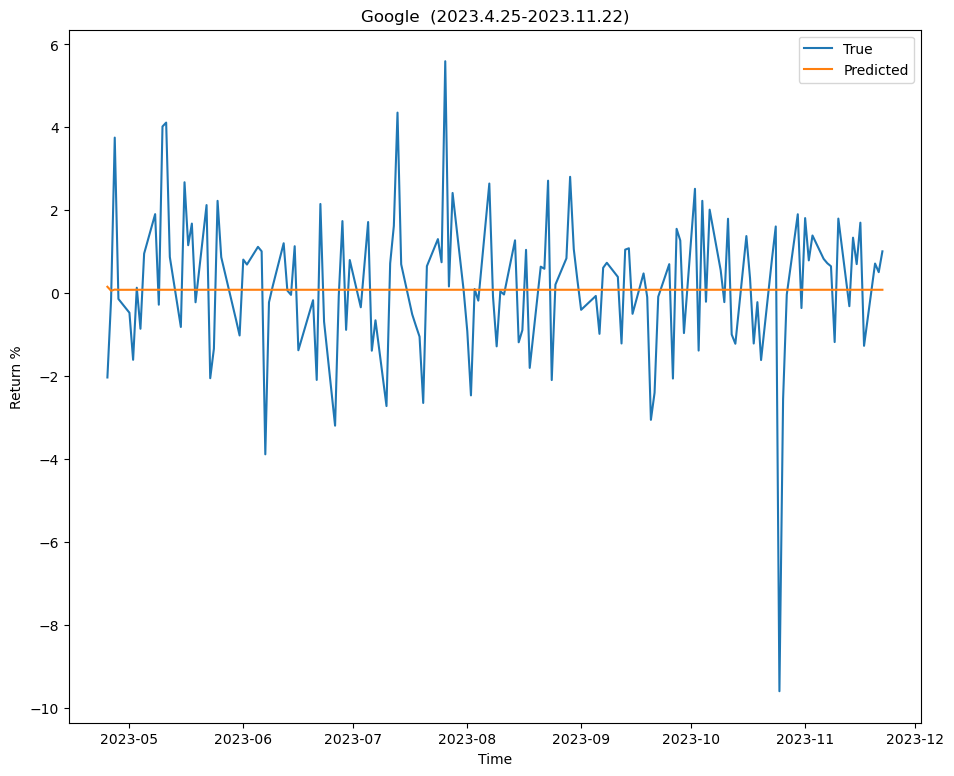

In [152]:
plt.plot(test['Google'], label='True')
plt.plot(forecast['Google'],label='Predicted')
plt.xlabel('Time')
plt.ylabel('Return %')
plt.title('Google  (2023.4.25-2023.11.22)')
plt.legend()
plt.show()

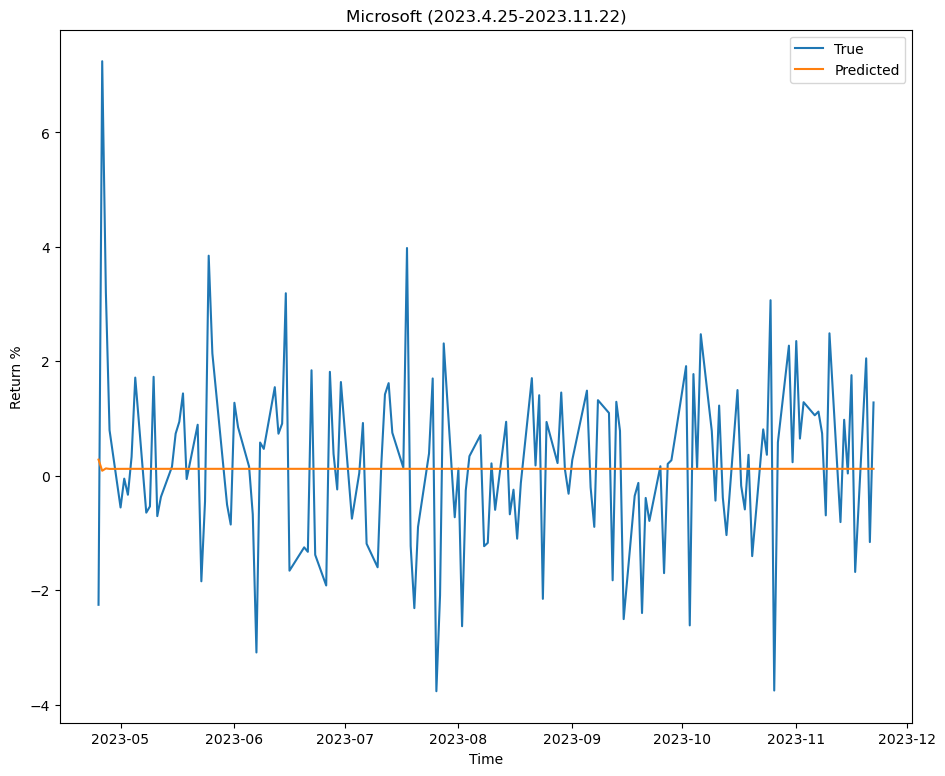

In [153]:
plt.plot(test['Microsoft'], label='True')
plt.plot(forecast['Microsoft'],label='Predicted')
plt.xlabel('Time')
plt.ylabel('Return %')
plt.title('Microsoft (2023.4.25-2023.11.22)')
plt.legend()
plt.show()

### Calculate the accuracy

In [154]:
def forecast_accuracy(forecast, actual):
    
    mse =np.mean((forecast - actual)**2)
    rmse = np.mean((forecast - actual)**2)**.5  

    return({'mse':mse,'rmse':rmse})

In [155]:
print('Forecast Accuracy of: Google')
accuracy_prod = forecast_accuracy(forecast['Google'], test['Google'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))


print('\nForecast Accuracy of: Microsoft')
accuracy_prod = forecast_accuracy(forecast['Microsoft'], test['Microsoft'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))


Forecast Accuracy of: Google
mse :  3.0498
rmse :  1.7464

Forecast Accuracy of: Microsoft
mse :  2.3923
rmse :  1.5467


## Rolling Forecast

In [156]:
rolling_predictions = pd.DataFrame()
test_size = 148

for i in range(test_size):
    train = df_all[:-(test_size-i)]  
    
    forecast_input = train.values[-1:]
    
    model = VAR(train)
    model_fitted = model.fit(1)
    pred = model_fitted.forecast(y=forecast_input, steps=1)
    forecast = pd.DataFrame(pred, columns=df_all.columns )
    rolling_predictions = rolling_predictions.append(forecast)

In [157]:
rolling_predictions.index = test.index
rolling_predictions

,Google,Microsoft,Apple,Amazon
Date,,,,
2023-04-25 00:00:00-04:00,0.228822,0.360894,0.196245,0.007032
2023-04-26 00:00:00-04:00,0.189388,0.427808,0.261717,0.087855
2023-04-27 00:00:00-04:00,-0.687124,-1.116651,-0.374993,0.203218
2023-04-28 00:00:00-04:00,-0.190197,-0.399531,-0.164587,-0.127739
2023-05-01 00:00:00-04:00,-0.352368,-0.246336,-0.209813,-0.129118
...,...,...,...,...
2023-11-16 00:00:00-05:00,-0.062032,0.010262,-0.004944,-0.053560
2023-11-17 00:00:00-05:00,-0.172767,-0.240744,-0.123347,-0.065165
2023-11-20 00:00:00-05:00,0.377708,0.531898,0.403229,0.191955


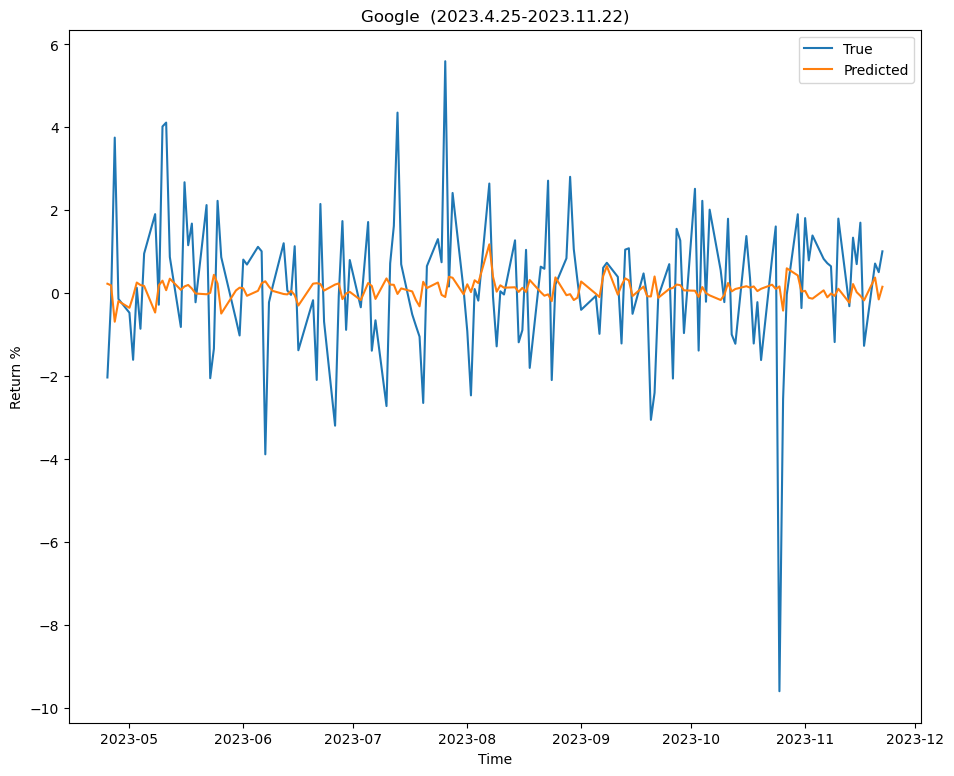

In [158]:
plt.plot(test['Google'], label='True')
plt.plot(rolling_predictions['Google'],label='Predicted')
plt.xlabel('Time')
plt.ylabel('Return %')
plt.title('Google  (2023.4.25-2023.11.22)')
plt.legend()
plt.show()

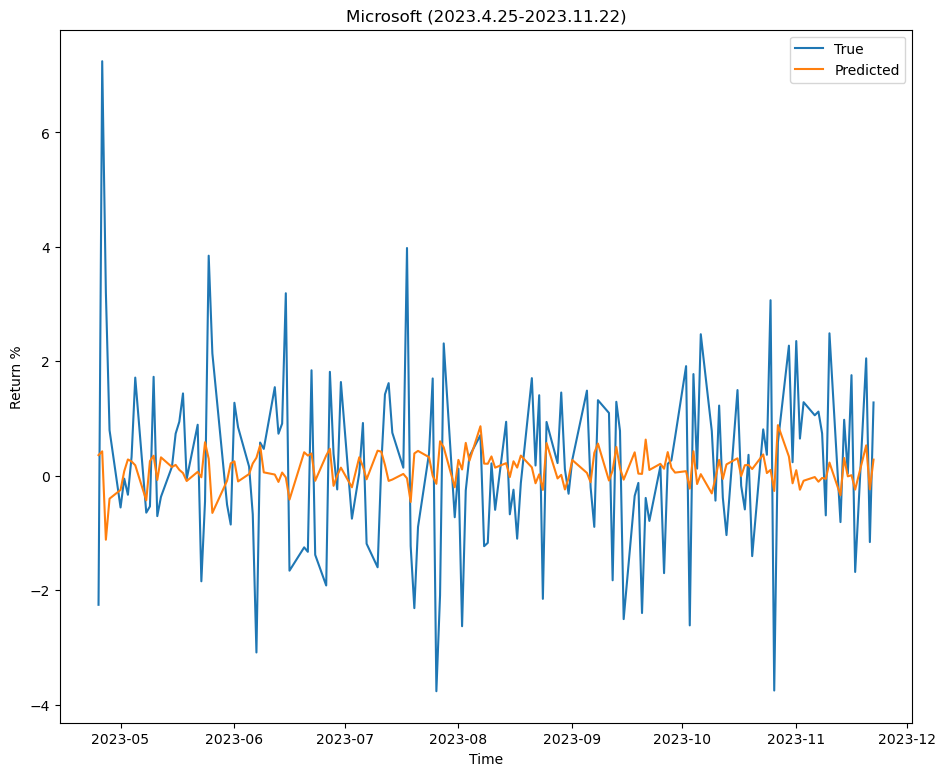

In [159]:
plt.plot(test['Microsoft'], label='True')
plt.plot(rolling_predictions['Microsoft'],label='Predicted')
plt.xlabel('Time')
plt.ylabel('Return %')
plt.title('Microsoft (2023.4.25-2023.11.22)')
plt.legend()
plt.show()

In [160]:
print('Rolling Forecast Accuracy of: Google')
accuracy_prod = forecast_accuracy(rolling_predictions['Google'], test['Google'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))


print('\n Rolling Forecast Accuracy of: Microsoft')
accuracy_prod = forecast_accuracy(rolling_predictions['Microsoft'], test['Microsoft'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))
    

print('\n Rolling Forecast Accuracy of: Apple')
accuracy_prod = forecast_accuracy(rolling_predictions['Apple'], test['Apple'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))
    

print('\n Rolling Forecast Accuracy of: Amazon')
accuracy_prod = forecast_accuracy(rolling_predictions['Amazon'], test['Amazon'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))
    
    

Rolling Forecast Accuracy of: Google
mse :  3.0968
rmse :  1.7598

 Rolling Forecast Accuracy of: Microsoft
mse :  2.3947
rmse :  1.5475

 Rolling Forecast Accuracy of: Apple
mse :  1.5851
rmse :  1.259

 Rolling Forecast Accuracy of: Amazon
mse :  4.1531
rmse :  2.0379
